In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn 

In [3]:
import egttools as egt

In [4]:
R = 3
S = 0
P = 1
T= 4
delta = 0.9

In [5]:
payoffs = np.array([[R, R, S],
                    [R, R, delta*P+(1-delta)*S],
                    [T, delta*P +(1-delta)*T, P]])

In [6]:
Z = 20
beta = 1.0
mu = 0.0 #1e-3
evolver = egt.analytical.StochDynamics(3, payoffs, Z, mu=mu)

In [7]:
evolver.calculate_stationary_distribution(beta)

array([0.04863113, 0.71570742, 0.23566145])

In [8]:
def level_of_cooperation_small(R, S, T, P, delta, Z):
    payoffs = np.array([[R, R, S],
                    [R, R, delta*P+(1-delta)*S],
                    [T, delta*P +(1-delta)*T, P]])
    
    evolver = egt.analytical.StochDynamics(3, payoffs, Z, mu=mu)
    stationary = evolver.calculate_stationary_distribution(beta)
    ans = 0.0
    for i in range(len(payoffs)):
        ans = ans + stationary[i]*payoffs[i, i]
    return ans/R

In [9]:
def produce_large_matrix(R, S, T, P, delta):
    a = np.zeros((8,8))
    a[0, 0] = R;
    a[0, 1] = R;
    a[0, 2] = R*(1 - delta) + S*delta;
    a[0, 3] = R*(1 - delta) + S*delta;
    a[0, 4] = S*(1 - delta) + R*delta;
    a[0, 5] = S*(1 - delta) + R*delta;
    a[0, 6] = S;
    a[0, 7] = S;

    a[1, 0] = R;
    a[1, 1] = R;
    a[1, 2] = (R + S*delta + P*(delta**2) + 
         T*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[1, 3] =  R*(1 - delta) + S*delta*(1 - delta) + P*(delta**2);
    a[1, 4] =  S*(1 - delta) + T*delta*(1 - delta) + R*(delta**2);
    a[1, 5] = (S + T*delta)/(1 + delta);
    a[1, 6] = (S + P*delta + T*(delta**2) + 
         R*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[1, 7] = S*(1 - delta) + P*delta;

    a[2, 0] = R*(1 - delta) + T*delta;
    a[2, 1] = (R + T*delta + P*(delta**2) + 
         S*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[2, 2] = (R + P*delta)/(1 + delta);
    a[2, 3] = R*(1 - delta) + P*delta*(1 - delta) + S*(delta**2);
    a[2, 4] =   S*(1 - delta) + R*delta*(1 - delta) + T*(delta**2);
    a[2, 5] = (S + R*delta + T*(delta**2) +      P*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[2, 6] = S;
    a[2, 7] = S;

    a[3, 0] = R*(1 - delta) + T*delta;
    a[3, 1] =   R*(1 - delta) + T*delta*(1 - delta) + P*(delta**2);
    a[3, 2] =   R*(1 - delta) + P*delta*(1 - delta) + T*(delta**2);
    a[3, 3] = R*(1 - delta) + P*delta;
    a[3, 4] = S*(1 - delta) + T*delta;
    a[3, 5] =   S*(1 - delta) + T*delta*(1 - delta) + P*(delta**2);
    a[3, 6] =   S*(1 - delta) + P*delta*(1 - delta) + T*(delta**2);
    a[3, 7] = S*(1 - delta) + P*delta;

    a[4, 0] = T*(1 - delta) + R*delta;
    a[4, 1] =   T*(1 - delta) + S*delta*(1 - delta) + R*(delta**2);
    a[4, 2] =   T*(1 - delta) + R*delta*(1 - delta) + S*(delta**2);
    a[4, 3] = T*(1 - delta) + S*delta;
    a[4, 4] = P*(1 - delta) + R*delta;
    a[4, 5] =   P*(1 - delta) + S*delta*(1 - delta) + R*(delta**2);
    a[4, 6] =   P*(1 - delta) + R*delta*(1 - delta) + S*(delta**2);
    a[4, 7] = P*(1 - delta) + S*delta;

    a[5, 0] = T*(1 - delta) + R*delta;
    a[5, 1] = (T + S*delta)/(1 + delta);
    a[5, 2] = (T + R*delta + S*(delta**2) + P*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[5, 3] =  T*(1 - delta) + S*delta*(1 - delta) + P*(delta**2);
    a[5, 4] = P*(1 - delta) + T*delta*(1 - delta) + R*(delta**2);
    a[5, 5] = P;
    a[5, 6] = (P + T*delta + R*(delta**2) + S*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[5, 7] = P;
    a[6, 0] = T;
    a[6, 1] = (T + P*delta + S*(delta**2) +  R*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[6, 2] = T;
    a[6, 3] =   T*(1 - delta) + P*delta*(1 - delta) + S*(delta**2);
    a[6, 4] =   P*(1 - delta) + R*delta*(1 - delta) + T*(delta**2);
    a[6, 5] = (P + S*delta + R*(delta**2) +      T*(delta**3))/(1 + delta + delta**2 + delta**3);
    a[6, 6] = (P + R*delta)/(1 + delta);
    a[6, 7] = P*(1 - delta) + S*delta;


    a[7, 0] = T;
    a[7, 1] = T*(1 - delta) + P*delta;
    a[7, 2] = T;
    a[7, 3] = T*(1 - delta) + P*delta;
    a[7, 4] = P*(1 - delta) + T*delta;
    a[7, 5] = P;
    a[7, 6] = P*(1 - delta) + T*delta;
    a[7, 7] = P;
    return a

In [10]:
def level_of_cooperation_large(R, S, T, P, delta, Z):
    matrix = produce_large_matrix(R, S, T, P, delta)
    evolver_large = egt.analytical.StochDynamics(8, matrix, Z, mu=mu)
    stationary = evolver_large.calculate_stationary_distribution(beta)
    ans = 0.0
    for i in range(len(matrix)):
        ans = ans + stationary[i]*matrix[i, i]
    return ans/R

In [25]:
def mapper(last_two_actions):
    assert len(last_two_actions) ==2 
    if last_two_actions == [0, 0]:
        return 2
    if last_two_actions == [0, 1]:
        return 3
    if last_two_actions == [1, 0]:
        return 4
    if last_two_actions == [1, 1]:
        return 5
    
def integer_to_binary(i):
        assert 0<= i < 64, "Invalid integer strategy"
        return [int(x) for x in '{:06b}'.format(i)]    
    
def estimate_payoff(player_one, player_two, R, S, T, P, delta):
    
    assert 0 <= delta <= 0.99
    
    payoff_matrix = np.array([[R, S], [T, P]])
    
    player_one_strategy = integer_to_binary(player_one)
    player_two_strategy = integer_to_binary(player_two)
    payoff_player_one = 0.0
    
    actions_player_1 = []
    actions_player_2 = []
    
    
    # ROUND 1
    i = 0
    action_player_one = player_one_strategy[0]
    action_player_two = player_two_strategy[0]
    
    actions_player_1.append(action_player_one)
    actions_player_2.append(action_player_two)
    
    payoff_player_one = payoff_player_one + (delta**i)* payoff_matrix[action_player_one, action_player_two]
    
    # ROUND 2
    i = 1
    action_player_one = player_one_strategy[1]
    action_player_two = player_two_strategy[1]
    
    actions_player_1.append(action_player_one)
    actions_player_2.append(action_player_two)
    
    payoff_player_one = payoff_player_one + (delta**i)* payoff_matrix[action_player_one, action_player_two]
    
    rounds = 500
    #if 0.95 <= delta <= 0.99:
    #    rounds = 500
    #if 0.98 <= delta <= 0.99:
    #    rounds = 1000
    
    for i in range(2, rounds):
        
        action_player_one = player_one_strategy[mapper(actions_player_2[-2:])]
        action_player_two = player_two_strategy[mapper(actions_player_1[-2:])]
    
        actions_player_1.append(action_player_one)
        actions_player_2.append(action_player_two)
    
        payoff_player_one = payoff_player_one + (delta**i)* payoff_matrix[action_player_one, action_player_two]
        
    return np.round((1-delta)*payoff_player_one, decimals=3)

In [26]:
def produce_very_large_matrix(R, S, T, P, delta):
    a = np.zeros((64,64))
    for i in range(0, 64):
        for j in range(0, 64):
            a[i, j] = estimate_payoff(i, j, R, S, T, P, delta)
    return a

In [27]:
def level_of_cooperation_very_large(R, S, T, P, delta, Z):
    matrix = produce_very_large_matrix(R, S, T, P, delta)
    evolver_large = egt.analytical.StochDynamics(64, matrix, Z, mu=mu)
    stationary = evolver_large.calculate_stationary_distribution(beta)
    ans = 0.0
    for i in range(len(matrix)):
        ans = ans + stationary[i]*matrix[i, i]
    return ans/R

In [49]:
small = []
large = []
very_large = []
delta_line = np.linspace(0.0, 0.99, 100)
for delta_value in delta_line:
    small.append(level_of_cooperation_small(R, S, T, P, delta_value, 20))
    large.append(level_of_cooperation_large(R, S, T, P, delta_value, 20))
    very_large.append(level_of_cooperation_very_large(R, S, T, P, delta_value, 20))

/Users/juliangg/opt/anaconda3/lib/python3.9/site-packages/egttools/analytical/sed_analytical.py:752: RuntimeWarning: Some of the entries in the transition matrix are close to 1 (with a tolerance of 1e-11). This could result in more than one eigenvalue of magnitude 1 (the Markov Chain is degenerate), so please be careful when analysing the results.
  warn(


In [31]:
very_large[-1] = 0.8188547721391677

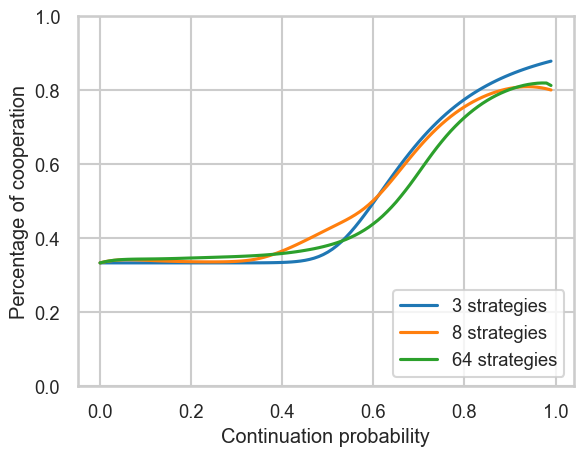

In [50]:
seaborn.set_context("talk", font_scale=0.8)
seaborn.set_style("whitegrid")
plt.plot(delta_line, small, label="3 strategies") #linestyle='dashed', color="gray",
plt.plot(delta_line, large, label="8 strategies") #linestyle='solid',color="black",
plt.plot(delta_line, very_large,label="64 strategies") # linestyle='solid',color="red"
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.xlabel("Continuation probability")
plt.ylabel("Percentage of cooperation");
plt.savefig("figure2_delta_v3.pdf", bbox_inches="tight")

In [45]:
small_Z = []
large_Z = []
very_large_Z = []
Z_line = list(range(10, 100))

for Z in Z_line:
    small_Z.append(level_of_cooperation_small(R, S, T, P, 0.9, Z))
    large_Z.append(level_of_cooperation_large(R, S, T, P, 0.9, Z))
    very_large_Z.append(level_of_cooperation_very_large(R, S, T, P, 0.9, Z))

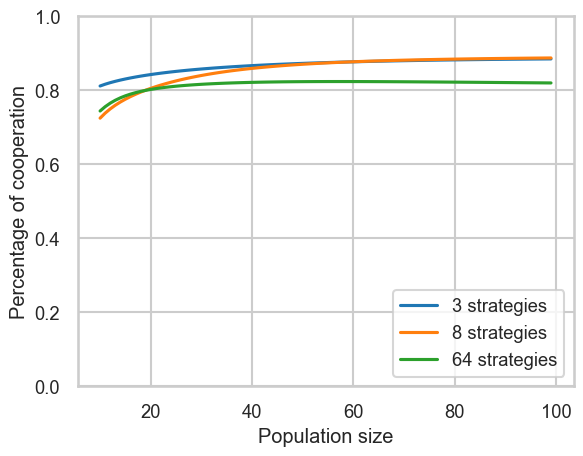

In [51]:
seaborn.set_context("talk", font_scale=0.8)
seaborn.set_style("whitegrid")
plt.plot(Z_line, small_Z, label="3 strategies")
plt.plot(Z_line, large_Z, label="8 strategies")
plt.plot(Z_line, very_large_Z, label="64 strategies")
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.xlabel("Population size")
plt.ylabel("Percentage of cooperation");
plt.savefig("figure2_popsize_v3.pdf", bbox_inches="tight")